## K-Means Clustering Notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DSC-680 Capstone/data/clustering_dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47284 entries, 0 to 47283
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ip                47284 non-null  int64
 1   app               47284 non-null  int64
 2   total_clicks      47284 non-null  int64
 3   click_time_range  47284 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


In [ ]:
df.describe()

,ip,app,total_clicks,click_time_range
count,47284.000000,47284.000000,47284.000000,47284.000000
mean,108655.982785,15.748350,1.168450,146.670058
std,84491.916989,20.695875,1.020477,573.872517
min,9.000000,0.000000,1.000000,0.000000
25%,44552.000000,3.000000,1.000000,0.000000
50%,90363.500000,12.000000,1.000000,0.000000
75%,147593.750000,19.000000,1.000000,0.000000
max,364744.000000,538.000000,54.000000,4295.000000


### Box Plots

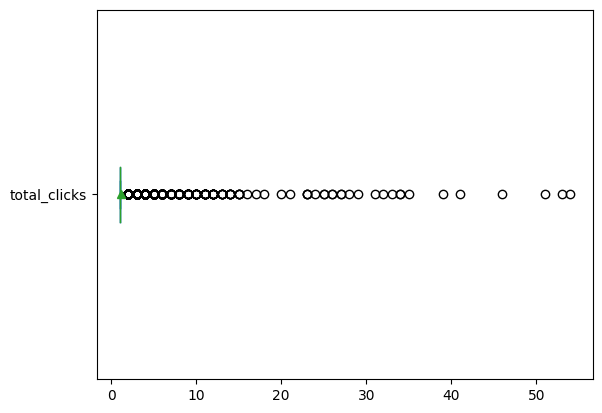

In [ ]:
df['total_clicks'].plot(kind='box', vert=False, showmeans=True)
plt.show()

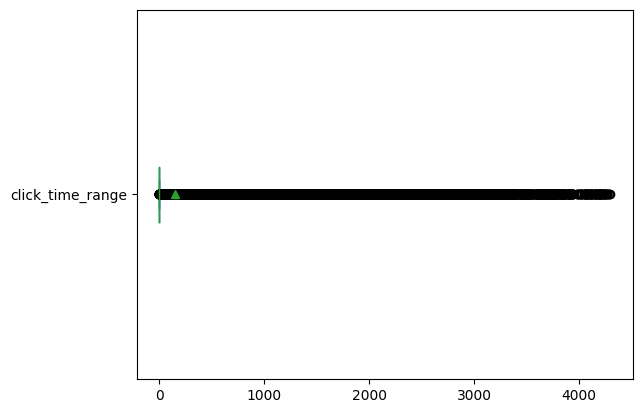

In [ ]:
df['click_time_range'].plot(kind='box', vert=False, showmeans=True)
plt.show()

### Histogram

In [ ]:
total_clicks_mean = df['total_clicks'].mean()
total_clicks_q5 = df['total_clicks'].quantile(0.05)
total_clicks_q95 = df['total_clicks'].quantile(0.95)

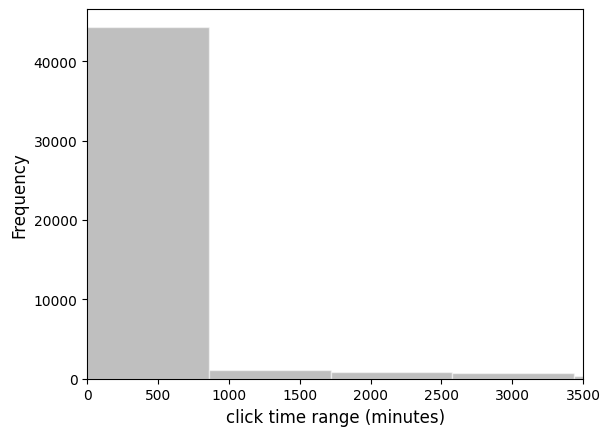

In [ ]:
plt.hist(df['click_time_range'], bins=5, color='gray', alpha=0.5, edgecolor='white')
plt.xlabel('click time range (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim(0,3500)
plt.show()

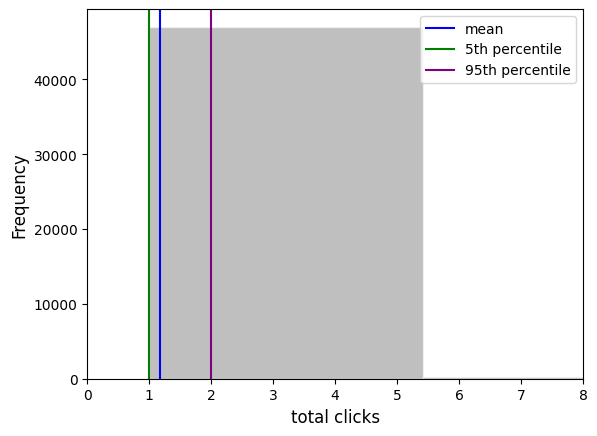

In [ ]:
plt.hist(df['total_clicks'], bins=12, color='gray', alpha=0.5, edgecolor="white")
plt.xlabel('total clicks', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim(0, 8)

plt.axvline(total_clicks_mean, color='blue', label='mean')
plt.axvline(total_clicks_q5, color='green', label='5th percentile')
plt.axvline(total_clicks_q95, color='purple', label='95th percentile')

plt.legend()
plt.show()

In [ ]:
df['total_clicks'].value_counts()

1     42935
2      3161
3       596
4       219
5       119
6        78
7        34
8        32
9        23
11       17
10       13
12       12
14        6
13        6
15        4
23        3
26        2
25        2
34        2
27        2
18        1
21        1
46        1
35        1
16        1
31        1
24        1
17        1
28        1
53        1
29        1
41        1
33        1
39        1
54        1
20        1
32        1
51        1
Name: total_clicks, dtype: int64

In [ ]:
df['click_time_range'].value_counts()

0       42945
1          15
3           9
1418        7
96          7
        ...  
2967        1
2811        1
238         1
937         1
2163        1
Name: click_time_range, Length: 2539, dtype: int64

### K-Means Algorithm

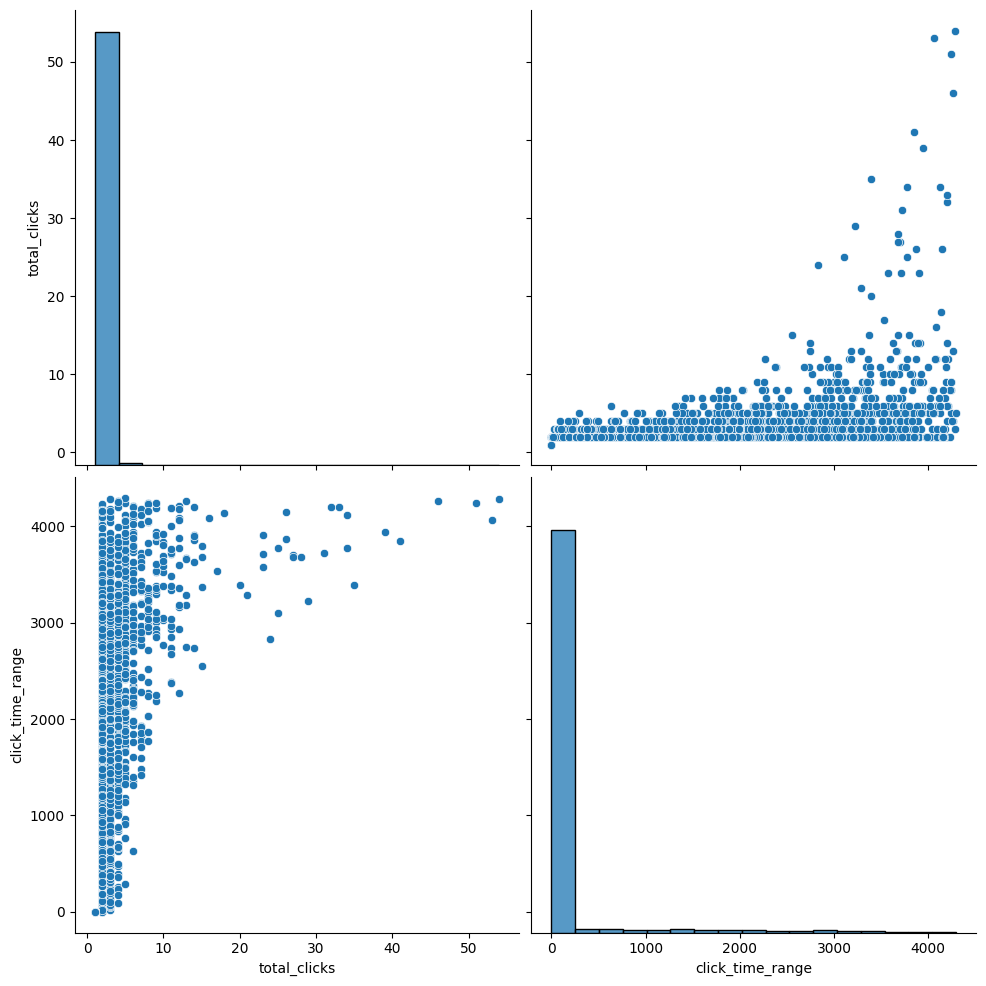

In [ ]:
# plot total_clicks and click_time_range
sns.pairplot(df[['total_clicks', 'click_time_range']], height=5)
plt.show()

In [ ]:
import sklearn.cluster as cluster

In [ ]:
kmeans = cluster.KMeans(n_clusters=4, init='k-means++')
kmeans = kmeans.fit(df[['total_clicks', 'click_time_range']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df['clusters'] = kmeans.labels_

In [ ]:
df.head()

,ip,app,total_clicks,click_time_range,clusters
0,114000,2,1,0,0
1,10238,28,1,0,0
2,67658,25,1,0,0
3,25071,15,2,1043,3
4,185269,3,1,0,0


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/DSC-680 Capstone/data/click_data_clusters.csv', index=False)

### Plot clusters on chart

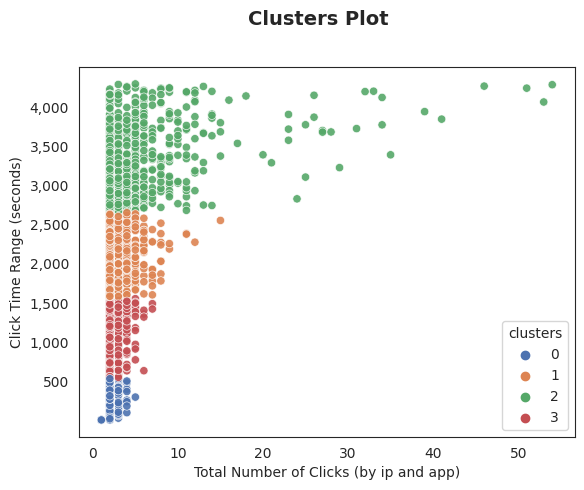

In [ ]:
sns.set_style("white")
sns.scatterplot(x='total_clicks', y='click_time_range', hue='clusters',  palette="deep", data=df, alpha=0.9)
plt.suptitle('Clusters Plot'.title(), fontsize=14, weight="bold", y=1.0)
plt.ylabel('Click Time Range (seconds)')
plt.xlabel('Total Number of Clicks (by ip and app)')
plt.yticks([500, 1000, 1500, 2000, 2500, 3000, 3500, 4000], labels=['500', '1,000', '1,500', '2,000', '2,500', '3,000', '3,500', '4,000'])
plt.show()

In [ ]:
df['clusters'].value_counts()

0    43902
3     1370
1     1050
2      962
Name: clusters, dtype: int64

In [ ]:
df_cluster_0 = df[df['clusters']==0]

In [ ]:
df_cluster_0['total_clicks'].value_counts()

1    42935
2      921
3       36
4        9
5        1
Name: total_clicks, dtype: int64